## Importing Packages

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, roc_auc_score
import seaborn as sns
from tqdm import tqdm

## Loading Data

In [2]:
# Importing Data
movieData = pd.read_csv(r'movieReplicationSet.csv')
movieRating = movieData.iloc[:, 0:400]

## Imputing Data

In [3]:
movieRating.loc[:, movieRating.isna().all(axis = 0)]

""
0
1
2
3
4
...
1092
1093
1094
1095


In [4]:
movieRating.loc[movieRating.isna().all(axis = 1)]

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
movieData = movieData.drop(896, axis = 0).reset_index(drop = True)
movieRate = movieRating.drop(896, axis = 0).reset_index(drop = True)
colAvg = movieRate.mean(axis = 0)
rowAvg = movieRate.mean(axis = 1)

In [6]:
for i in tqdm(range(len(movieRate.iloc[0]))):
    for j in range(len(movieRate)):
        if np.isnan(movieRate.iloc[j,i]):
            movieRate.iloc[j,i] = (colAvg[i] + rowAvg[j]) / 2

100%|██████████| 400/400 [00:34<00:00, 11.75it/s]


## Question 1

 For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings of the *other* 399 movies in the dataset to predict the ratings of each movie (that means you’ll have to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that predicts ratings the best. Then report the average COD of those 400 simple linear regression models. Please include a histogram of these 400 COD values and a table with the 10 movies that are most easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict from the ratings of a single other movie (and their associated COD values, as well as which movie ratings are the best predictor, so this table should have 3 columns).

In [7]:
bestPred = {}
slrCod = []

for i in tqdm(movieRate.columns):
    regee = movieRate[i]
    regor = movieRate.drop([i], axis = 1)
    temp = []
    for j in regor.columns:
        model = LinearRegression().fit(regor[[j]], regee)
        temp.append(model.score(regor[[j]], regee))
    bestInd = regor.columns[np.argmax(temp)]
    bestPred[i] = bestInd
    slrCod.append(np.max(temp))

100%|██████████| 400/400 [07:33<00:00,  1.13s/it]


In [8]:
print(np.round(np.mean(slrCod), 3))

0.424


Text(0.5, 1.0, 'Frequency of Coefficient of Determination')

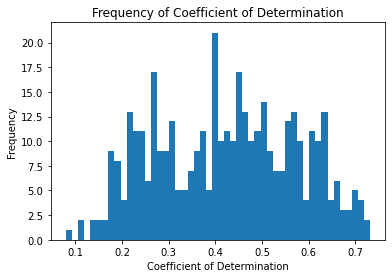

In [9]:
plt.hist(slrCod, bins = 50)
plt.xlabel('Coefficient of Determination')
plt.ylabel('Frequency')
plt.title('Frequency of Coefficient of Determination')

In [10]:
slrResult1= pd.DataFrame({'Movie': bestPred.keys(), 'Best Predictor': bestPred.values(), 'SLR Coefficient of Determination': np.round(slrCod, 3)})  
slrResult1= slrResult1.sort_values(by = 'SLR Coefficient of Determination', ascending=False)
slrResult = pd.concat([slrResult1.iloc[0:10], slrResult1.iloc[-10:]]).reset_index(drop = True)
slrResult

,Movie,Best Predictor,SLR Coefficient of Determination
0,Erik the Viking (1989),I.Q. (1994),0.732
1,I.Q. (1994),Erik the Viking (1989),0.732
2,Patton (1970),The Lookout (2007),0.714
3,The Lookout (2007),Patton (1970),0.714
4,The Bandit (1996),Best Laid Plans (1999),0.711
5,Best Laid Plans (1999),The Bandit (1996),0.711
6,Congo (1995),The Straight Story (1999),0.701
7,The Straight Story (1999),Congo (1995),0.701
8,The Final Conflict (1981),The Lookout (2007),0.700
9,Ran (1985),Heavy Traffic (1973),0.693


## Question 2

For the 10 movies that are best and least well predicted from the ratings of a single other movie (so 20 in total), build multiple regression models that include gender identity (column 475), sibship status (column 476) and social viewing preferences (column 477) as additional predictors (in addition to the best predicting movie from question 1). Comment on how R^2 has changed relative to the answers in question 1. Please include a figure with a scatterplot where the old COD (for the simple linear regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple regression models) is on the y-axis.

In [11]:
addRating = movieData.iloc[:, 474:477]
addRating[addRating.iloc[:, -2] == -1] = np.nan
addRating[addRating.iloc[:, -1] == -1] = np.nan

In [12]:
mlrCod = []
for i in tqdm(range(20)):
    temp = pd.concat([movieRate[[slrResult.iloc[i, 0]]], movieRate[[slrResult.iloc[i, 1]]], addRating], axis = 1).dropna()
    regee = temp.iloc[:,0]
    regor = temp.iloc[:,-4:]
    model = LinearRegression().fit(regor, regee)
    mlrCod.append(model.score(regor, regee))
mlrResult = pd.DataFrame({'MLR Coefficient of Determination': np.round(mlrCod, 3)})

100%|██████████| 20/20 [00:00<00:00, 150.24it/s]


In [13]:
newResult = pd.concat([slrResult, mlrResult], axis = 1)
newResult

,Movie,Best Predictor,SLR Coefficient of Determination,MLR Coefficient of Determination
0,Erik the Viking (1989),I.Q. (1994),0.732,0.732
1,I.Q. (1994),Erik the Viking (1989),0.732,0.731
2,Patton (1970),The Lookout (2007),0.714,0.711
3,The Lookout (2007),Patton (1970),0.714,0.712
4,The Bandit (1996),Best Laid Plans (1999),0.711,0.715
5,Best Laid Plans (1999),The Bandit (1996),0.711,0.715
6,Congo (1995),The Straight Story (1999),0.701,0.699
7,The Straight Story (1999),Congo (1995),0.701,0.700
8,The Final Conflict (1981),The Lookout (2007),0.700,0.698
9,Ran (1985),Heavy Traffic (1973),0.693,0.690


We can see that the $R^2$ has increased as we added more regressors.

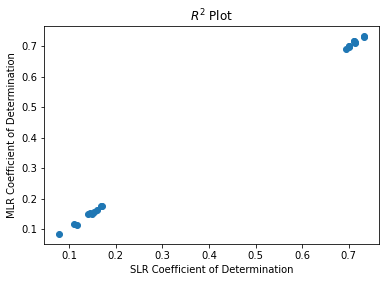

In [14]:
plt.scatter(newResult.iloc[:, -2], newResult.iloc[:, -1])
plt.title('$R^2$ Plot')
plt.xlabel('SLR Coefficient of Determination')
plt.ylabel('MLR Coefficient of Determination')
plt.show()

## Question 3

Pick 30 movies in the middle of the COD range, as identified by question 1 (that were not used in
question 2). Now build a regularized regression model with the ratings from 10 other movies (picked
randomly, or deliberately by you) as an input. Please use ridge regression, and make sure to do
suitable hyperparameter tuning. Also make sure to report the RMSE for each of these 30 movies in a
table, after doing an 80/20 train/test split. Comment on the hyperparameters you use and betas you
find by doing so.

In [15]:
midMovie = slrResult1.iloc[200:230]
regorMovie = slrResult1.iloc[230:240]

regor = movieRate.loc[:,regorMovie.iloc[:,0]]
ridRSME = []
ridAlpha = []
for i in tqdm(range(30)):
    regee = movieRate.loc[:,midMovie.iloc[i,0]]
    X_train, X_test, Y_train, Y_test = train_test_split(regor, regee, test_size = .20, random_state = 0)
    params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5,1.0, 5.0, 10.0, 20.0, 40.0, 70.0, 120.0, 200.0]}
    ridgeModel = Ridge()
    modelCV = GridSearchCV(ridgeModel, params)
    modelCV = modelCV.fit(X_train, Y_train)
    ridgePred = modelCV.predict(X_test)
    ridRSME.append(np.sqrt(mean_squared_error(ridgePred, Y_test)))
    ridAlpha.append(modelCV.best_params_['alpha'])

100%|██████████| 30/30 [00:07<00:00,  3.98it/s]


In [16]:
ridgeResult = pd.DataFrame({'Movie': midMovie.iloc[:,0], 'Best Alpha': ridAlpha, 'RSME': np.round(ridRSME, 3)}).reset_index(drop = True)

In [17]:
ridBeta = []
for i in tqdm(range(30)):
    regee = movieRate.loc[:,midMovie.iloc[i,0]]
    X_train, X_test, Y_train, Y_test = train_test_split(regor, regee, test_size = .20, random_state = 0)
    ridgeModel = Ridge(ridgeResult.iloc[i, 1])
    ridgeModel = ridgeModel.fit(X_train, Y_train)
    ridBeta.append(np.round(ridgeModel.coef_, 3))

100%|██████████| 30/30 [00:00<00:00, 410.62it/s]


In [18]:
ridgeResult = pd.DataFrame({'Movie': midMovie.iloc[:,0], 'Best Alpha': ridAlpha, 'RSME': np.round(ridRSME, 3)}).reset_index(drop = True)
ridBeta = pd.DataFrame(ridBeta, columns = ['Ace Ventura: When Nature Calls (1995)', 'Se7en (1995)', 'Men in Black (1997)', 'The Holiday (2006)', 'Meet the Parents (2000)'," Ocean's Eleven (2001)", 'A Clockwork Orange (1971)', '10000 BC (2008)', 'Eternal Sunshine of the Spotless Mind (2004)', 'I Robot (2004)'])
ridgeResult = pd.concat([ridgeResult, ridBeta], axis = 1)
ridgeResult

,Movie,Best Alpha,RSME,Ace Ventura: When Nature Calls (1995),Se7en (1995),Men in Black (1997),The Holiday (2006),Meet the Parents (2000),Ocean's Eleven (2001),A Clockwork Orange (1971),10000 BC (2008),Eternal Sunshine of the Spotless Mind (2004),I Robot (2004)
0,The Evil Dead (1981),40.0,0.358,0.111,0.058,0.037,0.060,0.038,0.097,0.015,0.081,0.132,0.166
1,Uptown Girls (2003),70.0,0.446,0.137,-0.004,0.020,0.034,0.163,0.110,0.085,0.081,0.123,0.097
2,The Machinist (2004),40.0,0.324,0.112,-0.003,0.118,0.021,0.139,0.104,0.004,0.121,0.077,0.065
3,The Blue Lagoon (1980),40.0,0.318,0.040,0.024,0.007,0.045,0.086,0.153,0.025,0.134,0.099,0.146
4,Knight and Day (2010),120.0,0.417,0.081,0.055,0.011,0.074,0.071,0.022,0.103,0.056,0.084,0.134
5,28 Days Later (2002),40.0,0.349,0.013,-0.023,0.013,0.015,0.091,0.163,0.058,0.172,0.125,0.125
6,Dances with Wolves (1990),70.0,0.312,0.123,0.013,0.030,0.028,0.136,0.105,0.037,0.076,0.136,0.103
7,Blues Brothers 2000 (1998),70.0,0.379,0.102,-0.026,0.093,0.040,0.113,0.097,0.060,0.059,0.132,0.075
8,Twister (1996),40.0,0.382,0.132,0.021,0.027,0.080,0.083,0.143,0.001,0.077,0.105,0.151
9,The Big Lebowski (1998),70.0,0.340,0.119,0.052,0.103,0.061,0.048,0.130,-0.012,0.076,0.105,0.074


## Question 4

Repeat question 3) with LASSO regression. Again, make sure to comment on the hyperparameters
you use and betas you find by doing so.

In [19]:
midMovie = slrResult1.iloc[200:230]
regorMovie = slrResult1.iloc[230:240]

regor = movieRate.loc[:,regorMovie.iloc[:,0]]
lasRSME = []
lasAlpha = []
for i in tqdm(range(30)):
    regee = movieRate.loc[:,midMovie.iloc[i,0]]
    X_train, X_test, Y_train, Y_test = train_test_split(regor, regee, test_size = .20, random_state = 0)
    params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5,1.0, 5.0, 10.0, 20.0, 40.0, 70.0, 120.0, 200.0]}
    lassoModel = Lasso()
    modelCV = GridSearchCV(lassoModel, params)
    modelCV = modelCV.fit(X_train, Y_train)
    lassoPred = modelCV.predict(X_test)
    lasRSME.append(np.sqrt(mean_squared_error(lassoPred, Y_test)))
    lasAlpha.append(modelCV.best_params_['alpha'])

100%|██████████| 30/30 [00:07<00:00,  3.97it/s]


In [20]:
lassoResult = pd.DataFrame({'Movie': midMovie.iloc[:,0], 'Best Alpha': lasAlpha, 'RSME': np.round(lasRSME, 3)}).reset_index(drop = True)

In [21]:
lasBeta = []
for i in tqdm(range(30)):
    regee = movieRate.loc[:,midMovie.iloc[i,0]]
    X_train, X_test, Y_train, Y_test = train_test_split(regor, regee, test_size = .20, random_state = 0)
    lassoModel = Lasso(lassoResult.iloc[i, 1])
    lassoModel = lassoModel.fit(X_train, Y_train)
    lasBeta.append(np.round(lassoModel.coef_, 3))

100%|██████████| 30/30 [00:00<00:00, 416.31it/s]


In [22]:
lassoResult = pd.DataFrame({'Movie': midMovie.iloc[:,0], 'Best Alpha': lasAlpha, 'RSME': np.round(lasRSME, 3)}).reset_index(drop = True)
lasBeta = pd.DataFrame(lasBeta, columns=['Ace Ventura: When Nature Calls (1995)', 'Se7en (1995)', 'Men in Black (1997)', 'The Holiday (2006)', 'Meet the Parents (2000)'," Ocean's Eleven (2001)", 'A Clockwork Orange (1971)', '10000 BC (2008)', 'Eternal Sunshine of the Spotless Mind (2004)', 'I Robot (2004)'])
lassoResult = pd.concat([lassoResult, lasBeta], axis = 1)
lassoResult

,Movie,Best Alpha,RSME,Ace Ventura: When Nature Calls (1995),Se7en (1995),Men in Black (1997),The Holiday (2006),Meet the Parents (2000),Ocean's Eleven (2001),A Clockwork Orange (1971),10000 BC (2008),Eternal Sunshine of the Spotless Mind (2004),I Robot (2004)
0,The Evil Dead (1981),0.00100,0.359,0.123,0.054,0.029,0.059,0.022,0.099,0.006,0.081,0.149,0.202
1,Uptown Girls (2003),0.01000,0.446,0.152,0.000,0.000,0.016,0.194,0.111,0.086,0.058,0.131,0.087
2,The Machinist (2004),0.00100,0.327,0.122,-0.016,0.135,0.016,0.158,0.110,-0.000,0.129,0.071,0.063
3,The Blue Lagoon (1980),0.00100,0.318,0.025,0.014,-0.000,0.043,0.084,0.175,0.017,0.151,0.104,0.172
4,Knight and Day (2010),0.01000,0.414,0.090,0.047,0.000,0.065,0.057,0.000,0.110,0.038,0.100,0.195
5,28 Days Later (2002),0.01000,0.350,0.000,-0.000,0.000,0.000,0.072,0.168,0.060,0.182,0.120,0.116
6,Dances with Wolves (1990),0.01000,0.318,0.137,0.000,0.005,0.017,0.155,0.110,0.028,0.056,0.154,0.105
7,Blues Brothers 2000 (1998),0.00001,0.381,0.124,-0.070,0.126,0.035,0.139,0.109,0.054,0.042,0.157,0.089
8,Twister (1996),0.01000,0.383,0.137,0.004,0.010,0.075,0.065,0.156,0.000,0.065,0.102,0.159
9,The Big Lebowski (1998),0.01000,0.347,0.134,0.030,0.112,0.048,0.016,0.150,-0.000,0.067,0.107,0.063


## Question 5

Compute the average movie enjoyment for each user (using only real, non-imputed data). Use these
averages as the predictor variable X in a logistic regression model. Sort the movies order of increasing
rating (also using only real, non-imputed data). Now pick the 4 movies in the middle of the score range
as your target movie. For each of them, do a media split (now using the imputed data) of ratings to
code movies above the median rating with the Y label 1 (= enjoyed) and movies below the median
with the label 0 (= not enjoyed). For each of these movies, build a logistic regression model (using X
to predict Y), show figures with the outcomes and report the betas as well as the AUC values.
Comment on the quality of your models. Make sure to use cross-validation methods to avoid
overfitting.

In [1]:
avgRating = np.mean(movieRating, axis = 0).sort_values(ascending = True)[198:202]
selectRate = movieRate.loc[:,avgRating.index]
for i in range(4):
    rateMedian = np.median(selectRate.iloc[:,i])
    selectRate.iloc[selectRate.iloc[:,i] < rateMedian, i] = 0
    selectRate.iloc[selectRate.iloc[:,i] != 0, i] = 1

NameError: name 'np' is not defined

([0.9545454545454546,
  0.8584078119827872,
  0.9540153833429824,
  0.8590909090909089],
 [array([[10.28532939]]),
  array([[5.96005022]]),
  array([[10.33151309]]),
  array([[4.97839277]])])

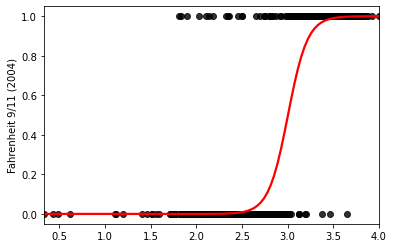

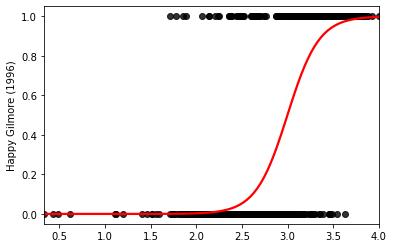

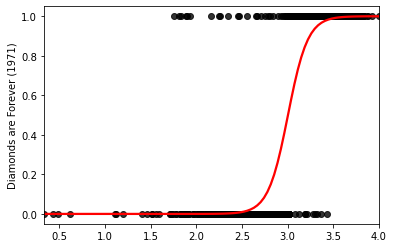

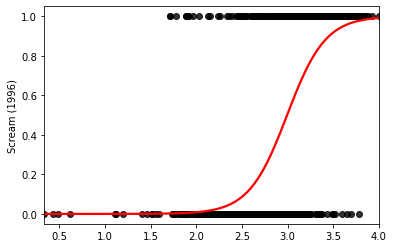

In [24]:
regor = np.mean(movieRating, axis = 1).dropna().values.reshape(-1, 1)
logAUC = []
logBeta = []
logPlot = []
for i in range(4):
    regee = selectRate.iloc[:,i]
    X_train, X_test, Y_train, Y_test = train_test_split(regor, regee, test_size = .20, random_state = 0)
    params = {'penalty': ['l2', 'none']}
    logModel = LogisticRegression()
    logCV = GridSearchCV(logModel, params)
    logCV = logCV.fit(X_train, Y_train)
    pred = logCV.predict(X_test)
    logAUC.append(roc_auc_score(Y_test, pred))
    logBeta.append(logCV.best_estimator_.fit(X_train, Y_train).coef_)
    plt.figure(i)
    sns.regplot(x = regor, y = regee, logistic = True, ci = None, scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
logAUC, logBeta

## Extra Credit

For random 10 selected movies, build lasso regression model with gender identity (column 475), sibship status (column 476) and social viewing preferences (column 477) as predictors.

In [25]:
extraMovie = slrResult1.iloc[230:240]

extraRSME = []
extraAlpha = []

for i in tqdm(range(len(extraMovie))):
    temp = pd.concat([movieRate[[extraMovie.iloc[i, 0]]], addRating], axis = 1).dropna()
    regee = temp.iloc[:,0]
    regor = temp.iloc[:,-3:]
    X_train, X_test, Y_train, Y_test = train_test_split(regor, regee, test_size = .20, random_state = 0)
    params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5,1.0, 5.0, 10.0, 20.0, 40.0, 70.0, 120.0, 200.0]}
    lassoModel = Lasso()
    modelCV = GridSearchCV(lassoModel, params)
    modelCV = modelCV.fit(X_train, Y_train)
    lassoPred = modelCV.predict(X_test)
    extraRSME.append(np.sqrt(mean_squared_error(lassoPred, Y_test)))
    extraAlpha.append(modelCV.best_params_['alpha'])

100%|██████████| 10/10 [00:02<00:00,  3.93it/s]


In [26]:
extraResult = pd.DataFrame({'Movie': extraMovie.iloc[:,0], 'Best Alpha': extraAlpha, 'RSME': np.round(extraRSME, 3)}).reset_index(drop = True)

In [27]:
extraBeta = []
extraRsq = []

for i in tqdm(range(len(extraMovie))):
    temp = pd.concat([movieRate[[extraMovie.iloc[i, 0]]], addRating], axis = 1).dropna()
    regee = temp.iloc[:,0]
    regor = temp.iloc[:,-3:]
    X_train, X_test, Y_train, Y_test = train_test_split(regor, regee, test_size = .20, random_state = 0)
    lassoModel = Lasso(lassoResult.iloc[i, 1])
    lassoModel = lassoModel.fit(X_train, Y_train)
    extraBeta.append(lassoModel.coef_)
    extraRsq.append(lassoModel.score(regor, regee))

100%|██████████| 10/10 [00:00<00:00, 161.15it/s]


In [28]:
extraResult = pd.DataFrame({'Movie': extraMovie.iloc[:,0], 'Best Alpha': extraAlpha, 'RSME': np.round(extraRSME, 3), '$R^2$': np.round(extraRsq, 5)}).reset_index(drop = True)
extraBeta = pd.DataFrame(extraBeta, columns=['Gender identity', 'Only child', 'Movies are best enjoyed alone'])
extraResult = pd.concat([extraResult, extraBeta], axis = 1)
extraResult

,Movie,Best Alpha,RSME,$R^2$,Gender identity,Only child,Movies are best enjoyed alone
0,The Intouchables (2011),0.010,0.468,0.00250,-0.063208,-0.026349,0.001577
1,The Godfather (1972),0.010,0.561,0.00487,0.050867,0.000000,-0.000000
2,The Godfather: Part II (1974),0.100,0.502,0.00310,0.067119,-0.009380,0.007791
3,Pirates of the Caribbean: The Curse of the Bla...,0.100,0.688,0.00013,-0.027818,-0.031164,-0.029225
4,Baby Geniuses (1999),0.010,0.478,0.00177,-0.026493,-0.000000,-0.000000
5,Cast Away (2000),0.001,0.500,0.00115,0.000000,-0.013228,0.012675
6,Pirates of the Caribbean: At World's End (2007),0.100,0.691,0.00951,-0.110915,-0.000000,-0.042273
7,Rosemary's Baby (1968),0.100,0.485,0.00529,-0.061458,-0.080575,0.003798
8,Night of the Living Dead (1968),0.010,0.404,0.00027,0.000000,-0.012804,0.000000
9,The Transporter (2002),0.100,0.414,0.00140,0.000000,-0.000000,-0.016117
